### DS Academy challenge
# Cars Price Prediction
#### Piotr Baryczkowski

## Exploratory data analysis

Firstly we will categorize data types of attributes from Otomoto dataset, to correctly apply statistical measurements and conclude certain assumptions about it. In the next step we are going to analyse the distributions of attributes, look for errors and missing values. In the last step we will try to understand how certain attributes affect target price of vehicle e.g. is newer car more expensive than a slightly older car (vehicle_year attribute)?

#### Python libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Dataset overview

In [16]:
# Load dataset
df = pd.read_csv(f"{os.getcwd()}/dataset/otomoto_price_prediction_data.csv")
# Display first 5 rows from dataset
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0


In [17]:
df.shape

(206207, 11)

Dataset consists of 206207 samples, which are described with 10 attributes and the target price.

#### Attribute types

__Categorical attributes:__

- Nominal
  - make
  - model
  - gearbox
  - fuel_type

__Numerical attributes:__

- Discrete
  - damaged
  - is_business

- Interval
  - vehicle_year

- Continuous
  - mileage
  - engine_capacity
  - engine_power

#### Target type

The target price is categorized as a continuous type.

#### Looking for missing values and errors

Firstly we will make sure if there are some missing values in our dataset.

In [18]:
df.isna().sum()

make                  0
model                 0
vehicle_year          0
mileage            1354
engine_capacity    2178
engine_power       1579
gearbox            1365
fuel_type             0
damaged               0
is_business           0
target_price          0
dtype: int64

As we can see there is some lack of data in mileage, engine_capacity, engine_power and gearbox attribute. We will deal with this problem later in data preprocessing phase.

Now we will look for some errors.

In [19]:
df.describe()

,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,target_price
count,206207.000000,2.048530e+05,204029.000000,204628.000000,206207.000000,206207.000000,2.062070e+05
mean,2012.313855,6.656787e+05,1865.096922,151.300301,0.038059,0.600038,6.273519e+04
std,6.453940,2.040768e+08,708.559717,76.915073,0.191339,0.489891,8.604596e+04
min,1917.000000,1.000000e+00,400.000000,1.000000,0.000000,0.000000,6.000000e+02
25%,2008.000000,4.500000e+04,1461.000000,105.000000,0.000000,0.000000,1.799900e+04
50%,2013.000000,1.378500e+05,1797.000000,136.000000,0.000000,1.000000,3.590000e+04
75%,2017.000000,1.990000e+05,1997.000000,170.000000,0.000000,1.000000,7.490000e+04
max,2021.000000,9.060612e+10,8400.000000,1500.000000,1.000000,1.000000,5.250000e+06


In the table above, we can find some interesting information e.g. minimal engine_power is 1 or maximum mileage which is 90 billions. To build the model correctly we will have to clear our data from that noise.

### Statistics

#### Target price distribution

1. The distribution is left skewed and of high variance
2. 75% of cars cost less than 74900 PLN
3. Maximum value of vehicle is 5250000 PLN, minimum is equal 600 PLN

I reckon, that these single cars with high prices can affect our model, so we have to consider that later.

In [315]:
df.target_price.describe()

count    2.062070e+05
mean     6.273519e+04
std      8.604596e+04
min      6.000000e+02
25%      1.799900e+04
50%      3.590000e+04
75%      7.490000e+04
max      5.250000e+06
Name: target_price, dtype: float64

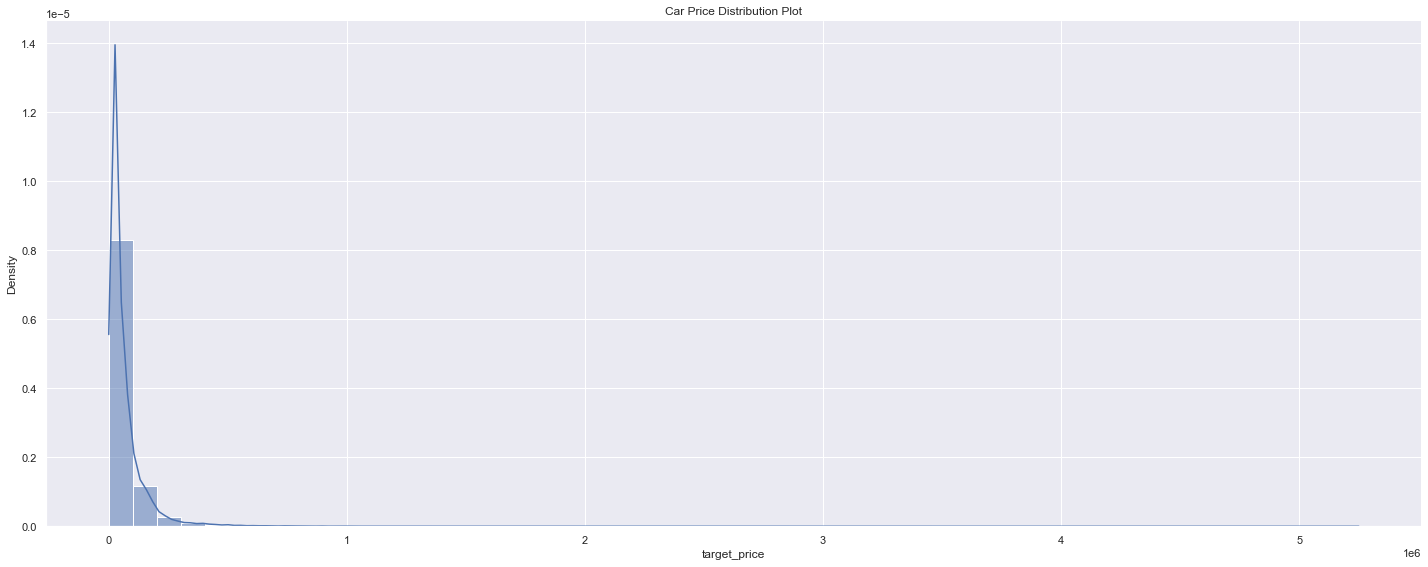

In [271]:
IQR = df.target_price.quantile(0.75) - df.target_price.quantile(0.25)
h = 2 * IQR * len(df.target_price)**(-1/3)
bins = (np.max(df.target_price) - np.min(df.target_price)) // h

sns.displot(data=df.target_price, stat="density", kde=True,
            bins=int(np.sqrt(bins)), height=8, aspect=20 / 8).set(title='Car Price Distribution Plot');

#### Make

Make attribute consists of 108 unique values. The most popular make is Volkswagen.

In [167]:
df.make.describe()

count         206207
unique           108
top       volkswagen
freq           18392
Name: make, dtype: object

In [170]:
makes_counted = df.make.value_counts()
top_makes = makes_counted.head(15)
print(f"Most popular makes:\n{top_makes}")

Most popular makes:
volkswagen       18392
opel             16652
ford             16437
bmw              15783
audi             15349
mercedes-benz    11613
toyota           10839
renault          10687
skoda            10586
peugeot           8255
citroen           7239
hyundai           6145
kia               6119
volvo             5781
nissan            5083
Name: make, dtype: int64


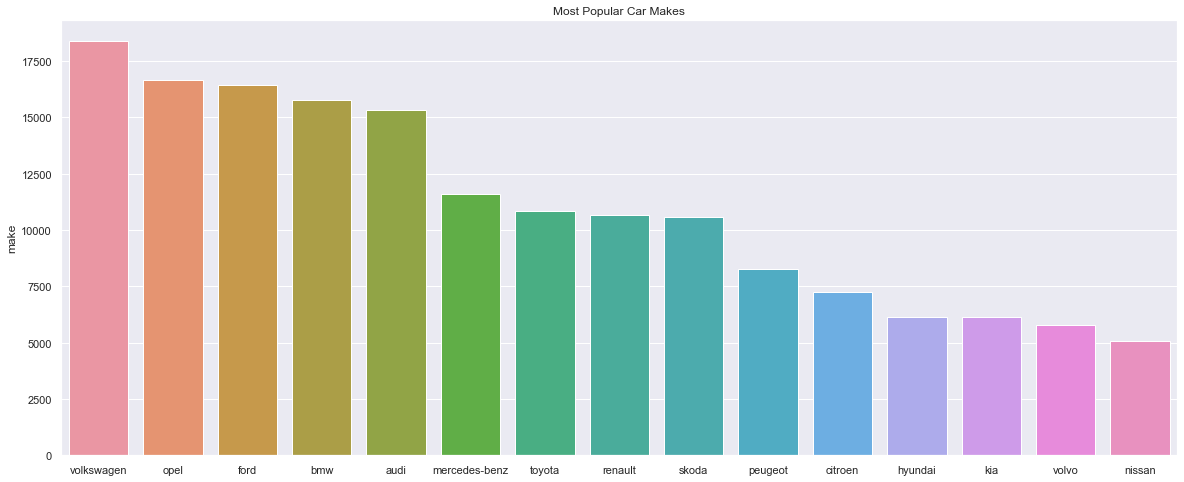

In [176]:
sns.barplot(x=top_makes.index, y=top_makes).set(title='Most Popular Car Makes');

In [182]:
rare_makes = makes_counted.tail(15)
print(f"Rarest makes:\n{rare_makes}")

Rarest makes:
radical        2
gaz            2
autobianchi    2
vanderhall     2
brilliance     2
piaggio        1
tarpan         1
talbot         1
bac            1
scion          1
vauxhall       1
grecav         1
shuanghuan     1
moskwicz       1
zastawa        1
Name: make, dtype: int64


#### Model

In our dataset we can find 1165 unique car models. Astra is the most popular vehicle model in our dataset.

In [183]:
df.model.describe()

count     206207
unique      1165
top        astra
freq        5573
Name: model, dtype: object

Now we will look at the most popular vehicle models for our top_makes.

In [211]:
make_most_popular_model = df.groupby('make').agg({'model': lambda x: x.mode().max()}).reset_index()
top_models = make_most_popular_model.loc[make_most_popular_model['make'].isin(top_makes.index)]
top_models

,make,model
6,audi,a4
11,bmw,seria-3
19,citroen,c3
31,ford,focus
37,hyundai,i30
43,kia,ceed
56,mercedes-benz,klasa-e
63,nissan,qashqai
66,opel,astra
68,peugeot,308


#### Gearbox and fuel type

In our dataset we can find 10 unique gearboxes and 7 unique fuel types. The most popular gearbox is manual and the most popular fuel type is petrol.

In [216]:
df[['gearbox', 'fuel_type']].describe()

,gearbox,fuel_type
count,204842,206207
unique,10,7
top,manual,petrol
freq,133598,103723


As we can see below manual and automatic gearbox make up 97.3% of our dataset. The rest of vehicles mainly have dual-clutch or cvt gearboxes. There are few cars with semi-automatic, automatic-stepless, automatic-sequential, automatic-manual or automatic-stepless-sequential gearbox. Rarest gearbox, that we can find in our dataset is manual-sequential used in F1 cars.

In [220]:
top_gearbox = df.gearbox.value_counts()
print(f"Most popular gearbox:\n{top_gearbox}")

Most popular gearbox:
manual                           133598
automatic                         67034
dual-clutch                        2331
cvt                                1742
semi-automatic                       83
automatic-stepless                   31
automatic-sequential                  9
automated-manual                      7
automatic-stepless-sequential         6
manual-sequential                     1
Name: gearbox, dtype: int64


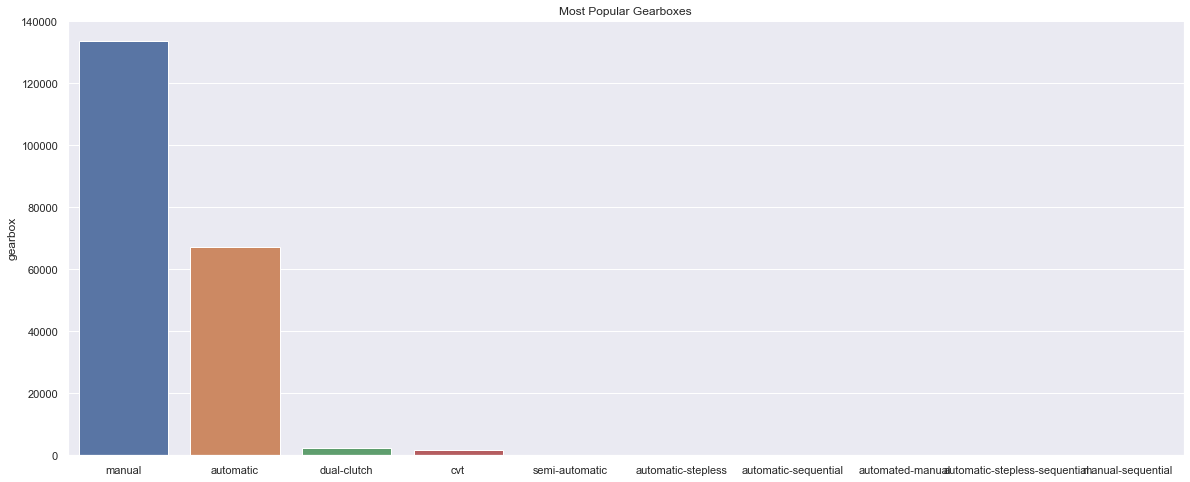

In [218]:
sns.barplot(x=top_gearbox.index, y=top_gearbox).set(title='Most Popular Gearboxes');

The most popular fuel types are petrol and diesel. More than 6000 cars are electric and hybrid. Almost 9000 cars have petrol-lpg fuel type. The least popular fuel types are petrol-cng and etanol.

In [221]:
top_fuel = df.fuel_type.value_counts()
print(f"Most popular fuel type:\n{top_fuel}")

Most popular fuel type:
petrol        103723
diesel         87669
petrol-lpg      8655
hybrid          5106
electric         994
petrol-cng        59
etanol             1
Name: fuel_type, dtype: int64


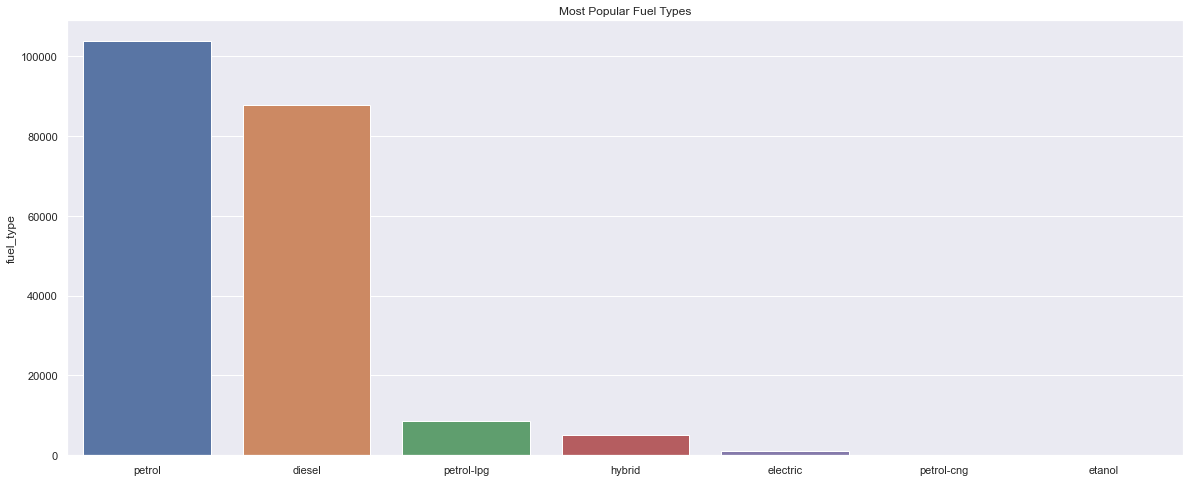

In [222]:
sns.barplot(x=top_fuel.index, y=top_fuel).set(title='Most Popular Fuel Types');

#### Vehicle year

The histogram of vehicle production year is right skewed. The oldest car is from 1917 and the newest is from 2021. As we can observe 75% of cars were produced after 2008, half of them after 2013 and 25% of them after 2017.

In [297]:
df.vehicle_year.describe()

count    206207.000000
mean       2012.313855
std           6.453940
min        1917.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2021.000000
Name: vehicle_year, dtype: float64

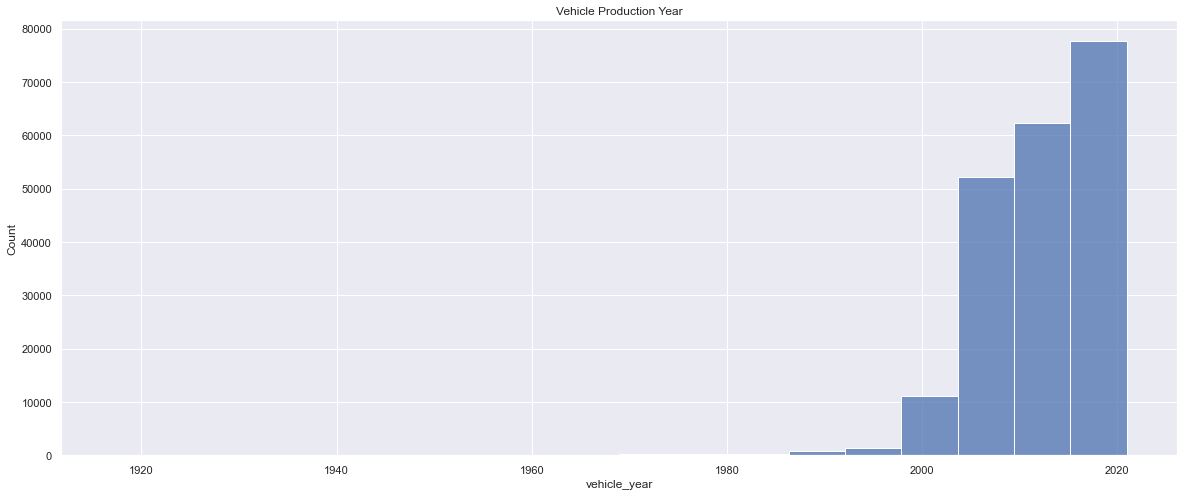

In [321]:
sns.histplot(data=df.vehicle_year, bins=18).set(title='Vehicle Production Year');

#### Damaged and business cars

96% of cars in our dataset are not damaged. 60% of sellers are business sellers rest of them are individual sellers.

In [314]:
is_damaged = df.damaged.copy()
is_damaged = is_damaged.map({0: 'No', 1: 'Yes'})
print(f"Not damaged: {(is_damaged.value_counts()[0] / len(is_damaged) * 100):.2f}%\n"
      f"Damaged: {(is_damaged.value_counts()[1] / len(is_damaged) * 100):.2f}%\n")
print(f"Is car damaged:\n{is_damaged.value_counts()}")

Not damaged: 96.19%
Damaged: 3.81%

Is car damaged:
No     198359
Yes      7848
Name: damaged, dtype: int64


In [313]:
seller_type = df.is_business.copy()
seller_type = seller_type.map({0:'individual', 1:'business'})
print(f"Business seller: {(seller_type.value_counts()[0] / len(seller_type) * 100):.2f}%\n"
      f"Individual seller: {(seller_type.value_counts()[1] / len(seller_type) * 100):.2f}%\n")
print(f"Type of sellers:\n{seller_type.value_counts()}")

Business seller: 60.00%
Individual seller: 40.00%

Type of sellers:
business      123732
individual     82475
Name: is_business, dtype: int64
